In [8]:
!ls ../experiments/logs/attn_sweep_llama

1_1_128  1_1_32  2_1_128  2_1_32  3_1_128  3_1_32  4_1_128  4_1_32
1_1_16	 1_1_64  2_1_16   2_1_64  3_1_16   3_1_64  4_1_16   4_1_64


In [9]:
import glob
import os
import pandas as pd
import plotnine as p9

In [10]:
dfs = []
for file in glob.glob("../experiments/logs/attn_sweep_llama/**/SummaryEvaluator.csv"):
    evaluator = file.split("/")[-1].split(".")[0]
    layers, heads, dim = os.path.dirname(file).split("/")[-1].split(".")[0].split("_")
    log = pd.read_csv(file)
    print(file, ":", len(log))
    log["identifier"] = f"{layers}_{heads}_{dim}"
    log["layers"] = layers
    log["heads"] = heads
    log["dim"] = dim  
    log["evaluator"] = evaluator
    log["step_rel"] = log["step"] / log["step"].max()
    log = log.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "layers", "heads", "dim"]).mean().reset_index()
    dfs.append(log)
print(len(dfs))
df = pd.concat(dfs)
df = df.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "layers", "heads", "dim"]).mean().reset_index()
df

../experiments/logs/attn_sweep_llama/2_1_64/SummaryEvaluator.csv : 258661
../experiments/logs/attn_sweep_llama/2_1_32/SummaryEvaluator.csv : 258661
../experiments/logs/attn_sweep_llama/1_1_16/SummaryEvaluator.csv : 258661
../experiments/logs/attn_sweep_llama/1_1_64/SummaryEvaluator.csv : 258661
../experiments/logs/attn_sweep_llama/1_1_32/SummaryEvaluator.csv : 258661


ParserError: Error tokenizing data. C error: Expected 3 fields in line 10026, saw 4


/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


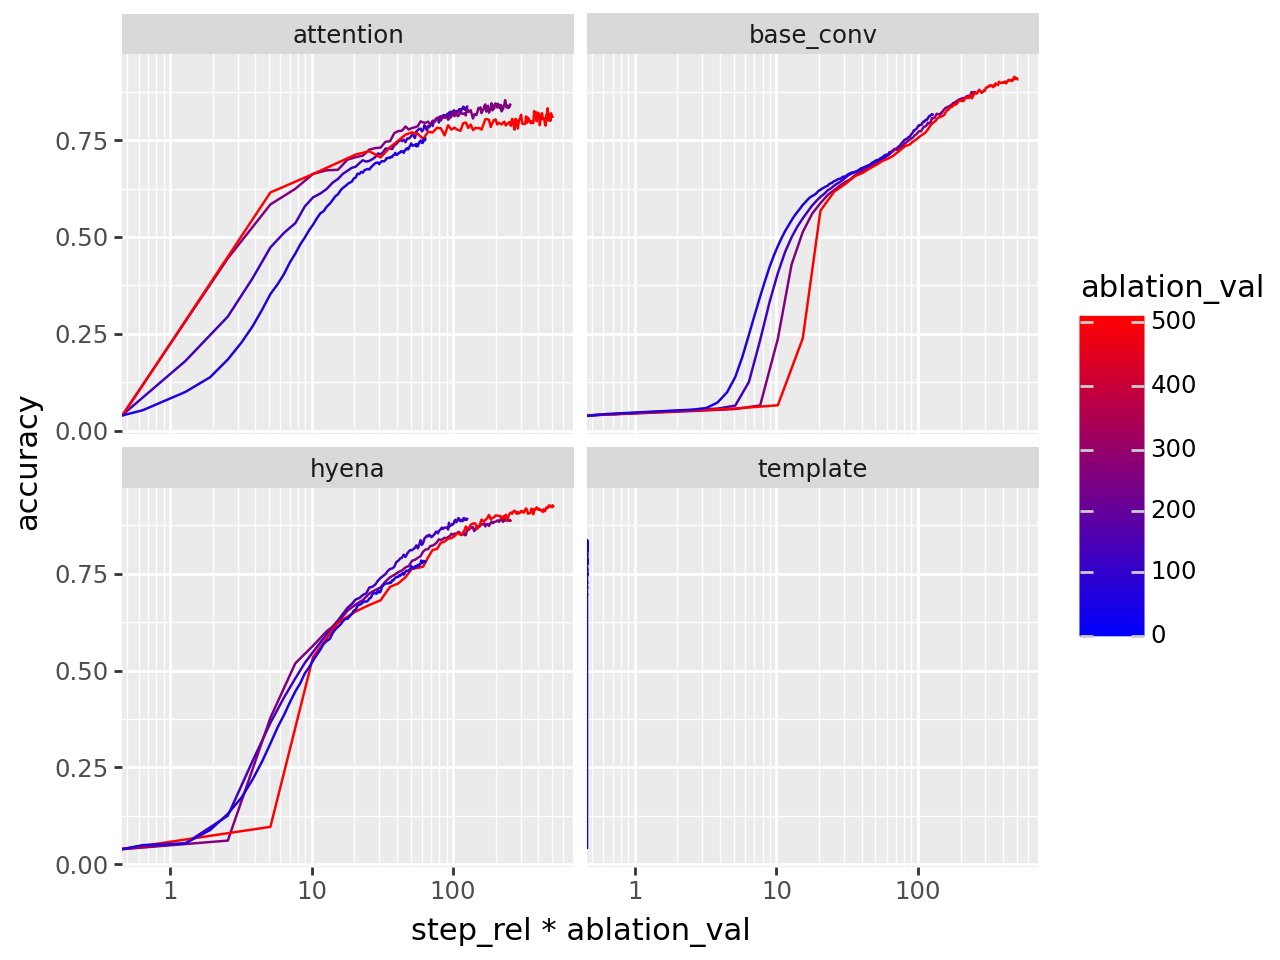

In [10]:
subset_df = df[df["variable"] == "query_item.pred_prob"]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel * ablation_val", y="value", color="ablation_val", group="identifier")) +
    p9.geom_line() +
    p9.facet_wrap("~ ablation") +
    p9.scale_x_log10() +
    p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()